# Predicting Employee Churn using Machine Learning

### Objective: The objective of this test is to build a machine learning model to predict employee churn (i.e., whether an employee will leave the company) based on various features.

In [2]:
#imports
import pandas as pd
import numpy as np

__Task 1__ : Data Preparation:

In [3]:
# Load the dataset
df = pd.read_csv('data.csv')

In [4]:
df.head()

satisfaction_level  last_evaluation  number_project  average_montly_hours   
0                0.42             0.46               2                   150  \
1                0.66             0.77               2                   171   
2                0.55             0.49               5                   240   
3                0.22             0.88               4                   213   
4                0.20             0.72               6                   224   

   time_spend_company  Work_accident  left  promotion_last_5years      sales   
0                   3              0     1                      0      sales  \
1                   2              0     0                      0  technical   
2                   3              0     0                      0  technical   
3                   3              1     0                      0  technical   
4                   4              0     1                      0  technical   

   salary  
0  medium  
1  medium  
2    high  
3  medium  
4  medium

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10499 entries, 0 to 10498
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     10499 non-null  float64
 1   last_evaluation        10499 non-null  float64
 2   number_project         10499 non-null  int64  
 3   average_montly_hours   10499 non-null  int64  
 4   time_spend_company     10499 non-null  int64  
 5   Work_accident          10499 non-null  int64  
 6   left                   10499 non-null  int64  
 7   promotion_last_5years  10499 non-null  int64  
 8   sales                  10499 non-null  object 
 9   salary                 10499 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 820.4+ KB


In [4]:
def summary(df):
    summary_df = pd.DataFrame(df.dtypes, columns=['Data Type'])
    summary_df['#Missing'] = df.isnull().sum().values
    summary_df['#Duplicate'] = df.duplicated().sum()
    summary_df['#Unique'] = df.nunique().values
    desc = df.describe(include='all').transpose()
    summary_df['Min'] = desc['min'].values
    summary_df['Max'] = desc['max'].values
    summary_df['Mean'] = desc['mean'].values
    summary_df['Std Dev'] = desc['std'].values
    

    return summary_df


In [5]:
summary(df).style.set_caption("__Summary of the Data__").\
    background_gradient(cmap='Pastel2_r', axis=0). \
    set_properties(**{'border': '1.3px dotted', 'color': '', 'caption-side': 'left'})

In [6]:
# Fill missing values in 'sales' and 'salary' with mode
for column in ['sales', 'salary']:
    df[column].fillna(df[column].mode()[0], inplace=True)

# Convert 'sales' and 'salary' into numerical format using one-hot encoding
df = pd.get_dummies(df, columns=['sales', 'salary'], drop_first=True)

# Display the first 5 rows of the cleaned dataset
df.head()



satisfaction_level  last_evaluation  number_project  average_montly_hours   
0                0.42             0.46               2                   150  \
1                0.66             0.77               2                   171   
2                0.55             0.49               5                   240   
3                0.22             0.88               4                   213   
4                0.20             0.72               6                   224   

   time_spend_company  Work_accident  left  promotion_last_5years   
0                   3              0     1                      0  \
1                   2              0     0                      0   
2                   3              0     0                      0   
3                   3              1     0                      0   
4                   4              0     1                      0   

   sales_RandD  sales_accounting  sales_hr  sales_management  sales_marketing   
0        False             False     False             False            False  \
1        False             False     False             False            False   
2        False             False     False             False            False   
3        False             False     False             False            False   
4        False             False     False             False            False   

   sales_product_mng  sales_sales  sales_support  sales_technical  salary_low   
0              False         True          False            False       False  \
1              False        False          False             True       False   
2              False        False          False             True       False   
3              False        False          False             True       False   
4              False        False          False             True       False   

   salary_medium  
0           True  
1           True  
2          False  
3           True  
4           True

In [7]:
# Get basic information about the cleaned dataset
df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10499 entries, 0 to 10498
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     10499 non-null  float64
 1   last_evaluation        10499 non-null  float64
 2   number_project         10499 non-null  int64  
 3   average_montly_hours   10499 non-null  int64  
 4   time_spend_company     10499 non-null  int64  
 5   Work_accident          10499 non-null  int64  
 6   left                   10499 non-null  int64  
 7   promotion_last_5years  10499 non-null  int64  
 8   sales_RandD            10499 non-null  bool   
 9   sales_accounting       10499 non-null  bool   
 10  sales_hr               10499 non-null  bool   
 11  sales_management       10499 non-null  bool   
 12  sales_marketing        10499 non-null  bool   
 13  sales_product_mng      10499 non-null  bool   
 14  sales_sales            10499 non-null  bool   
 15  sa

In [8]:
# Check for missing values
df.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
sales_RandD              0
sales_accounting         0
sales_hr                 0
sales_management         0
sales_marketing          0
sales_product_mng        0
sales_sales              0
sales_support            0
sales_technical          0
salary_low               0
salary_medium            0
dtype: int64

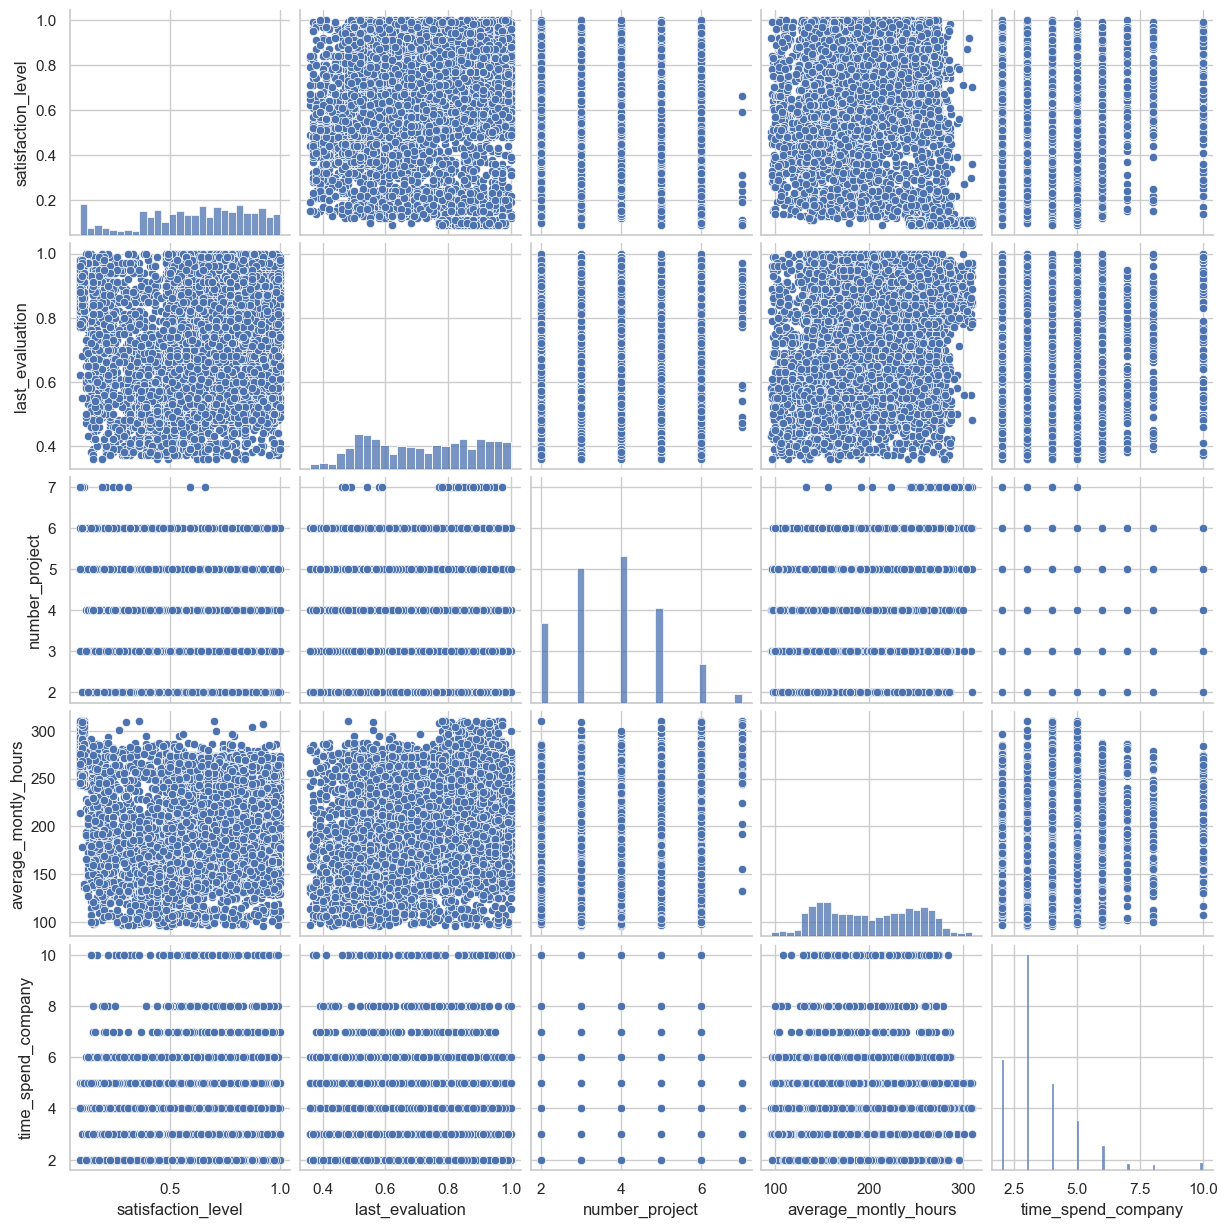

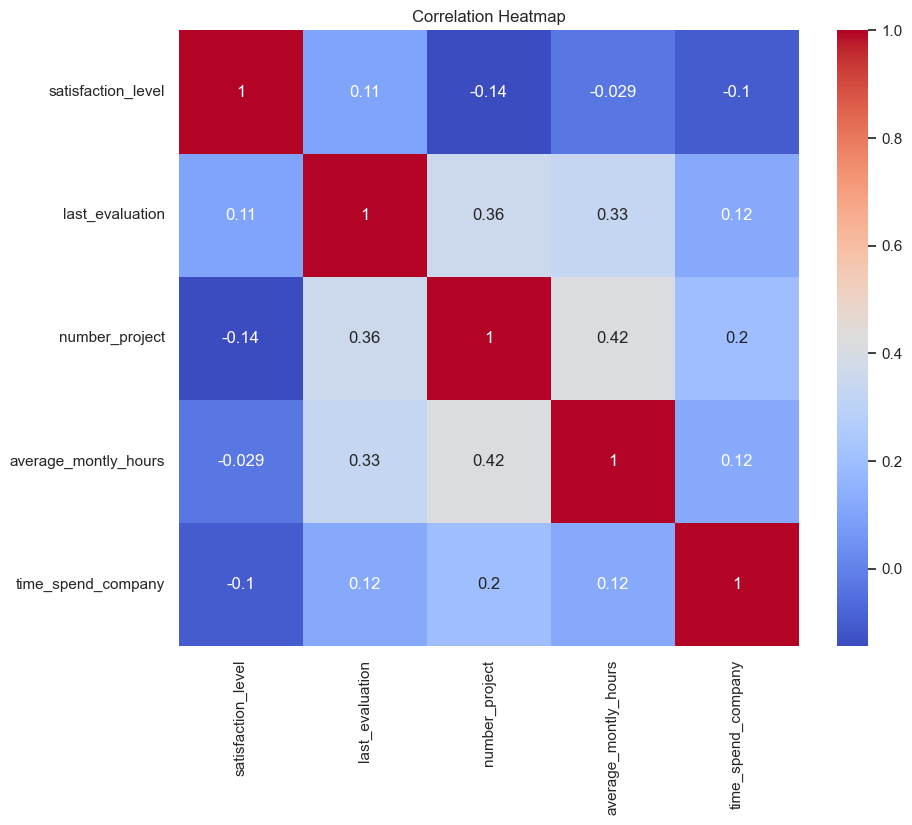

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set style for seaborn
sns.set(style="whitegrid")

# Create a pairplot for numerical columns
sns.pairplot(df[['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company']])
plt.show()

# Create a correlation heatmap
plt.figure(figsize=(10, 8))
correlation_matrix = df[['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


In [10]:
import plotly.express as px

# Bar plot for 'left' column
left_counts = df['left'].value_counts().reset_index()
left_counts.columns = ['Left', 'Count']
fig = px.bar(left_counts, x='Left', y='Count', title='Number of Employees Left vs Stayed', color='Left',
             labels={'Left': 'Left (0: Stayed, 1: Left)'}, color_discrete_sequence=['green', 'red'])
fig.show()

In [11]:
# Box plot for 'average_montly_hours' vs 'left'
fig = px.box(df, x='left', y='average_montly_hours', title='Box Plot of Average Monthly Hours vs Left',
             color='left', color_discrete_sequence=['red', 'green'], labels={'left': 'Left (0: Stayed, 1: Left)'})
fig.show()

In [14]:
import plotly.express as px

# Calculate the counts for each salary level
salary_counts = [df['salary_low'].sum(), df['salary_medium'].sum()]

# Since we already have 'salary_low' and 'salary_medium', we can directly use them
fig = px.pie(values=salary_counts, names=['Low', 'Medium'], 
             title='Salary Distribution', 
             color_discrete_sequence=['lightblue', 'lightgreen'])
fig.show()


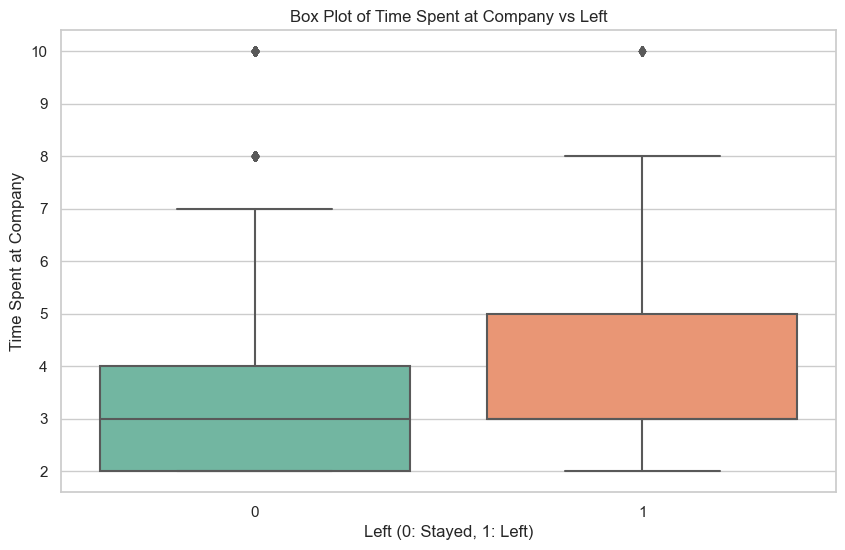

In [16]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='left', y='time_spend_company', data=df, palette='Set2')
plt.title('Box Plot of Time Spent at Company vs Left')
plt.xlabel('Left (0: Stayed, 1: Left)')
plt.ylabel('Time Spent at Company')
plt.show()


In [17]:
work_accident_counts = df['Work_accident'].value_counts().reset_index()
work_accident_counts.columns = ['Work Accident', 'Count']
fig = px.bar(work_accident_counts, x='Work Accident', y='Count', title='Number of Employees by Work Accident',
             color='Work Accident', color_discrete_sequence=['orange', 'blue'])
fig.show()


In [18]:
promotion_counts = df['promotion_last_5years'].value_counts().reset_index()
promotion_counts.columns = ['Promotion in Last 5 Years', 'Count']
fig = px.pie(promotion_counts, values='Count', names='Promotion in Last 5 Years', 
             title='Promotion in Last 5 Years Distribution', 
             color_discrete_sequence=['purple', 'pink'])
fig.show()


In [19]:
fig = px.histogram(df, x='satisfaction_level', nbins=30, title='Distribution of Satisfaction Level',
                   labels={'satisfaction_level': 'Satisfaction Level'})
fig.show()


__Task 2__: Handling Imbalanced Data

Handling imbalanced data is crucial, especially for tasks like predicting employee churn where one class might be significantly smaller than the other. Let's explore some techniques to handle imbalanced data and implement them using Python.

__Techniques for Handling Imbalanced Data__

1. **Oversampling**: This involves increasing the number of instances in the minority class by randomly replicating them or generating synthetic instances.

2. **Undersampling**: This involves reducing the number of instances in the majority class by randomly removing some of them.

3. **SMOTE (Synthetic Minority Over-sampling Technique)**: This technique involves creating synthetic samples in the minority class by interpolating between existing minority class instances.




## Implementation using SMOTE

In [22]:
!pip install imbalanced-learn


Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
  Obtaining dependency information for imbalanced-learn from https://files.pythonhosted.org/packages/6e/1b/66764ecf370e797759be06fb38c11640ea1f9456ae10f8640a33cfa726ea/imbalanced_learn-0.12.2-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/258.0 kB ? eta -:--:--
   - -------------------------------------- 10.2/258.0 kB ? eta -:--:--
   - -------------------------------------- 10.2/258.0 kB ? eta -:--:--
   ------ -------------------------------- 41.0/258.0 kB 326.8 kB/s eta 0:00:01
   ------ -------------------------------- 41.0/258.0 kB 326.8 kB/s eta 0:00:01
   ------------- ------------------------- 92.2/258.0 kB 438.1 kB/s eta 0:00:01
   ------------------------ ------------- 163.8/258.0 kB 656.4 kB/s eta 0:00:01
   ------------------------- ------------ 174.1/258.0 kB 655.4 kB/s eta 0:00:01
   -------------------------------------- 258.0/258.0 kB 794.0 kB/s eta 0:00:00


DEPRECATION: textract 1.6.5 has a non-standard dependency specifier extract-msg<=0.29.*. pip 23.3 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of textract or contact the author to suggest that they release a version with a conforming dependency specifiers. Discussion can be found at https://github.com/pypa/pip/issues/12063

[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [26]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
# Ignore warnings
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)
import os
# Set LOKY_MAX_CPU_COUNT to the number of cores
os.environ['LOKY_MAX_CPU_COUNT'] = '4'  # Replace '4' with the number of cores you want to use
# Splitting the dataset into features and target
X = df.drop('left', axis=1)
y = df['left']

# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize SMOTE
smote = SMOTE(random_state=42)

# Apply SMOTE to resample the training data
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Initialize Random Forest Classifier
rf = RandomForestClassifier(random_state=42)

# Train the Random Forest Classifier on the SMOTE resampled data
rf.fit(X_train_smote, y_train_smote)

# Predict on the test data
y_pred_smote = rf.predict(X_test)

# Evaluate the model
print("Accuracy on SMOTE resampled data:", accuracy_score(y_test, y_pred_smote))
print("\nClassification Report:\n", classification_report(y_test, y_pred_smote))


Accuracy on SMOTE resampled data: 0.8528571428571429

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.93      0.90      1436
           1       0.82      0.68      0.75       664

    accuracy                           0.85      2100
   macro avg       0.84      0.81      0.82      2100
weighted avg       0.85      0.85      0.85      2100



## Conclusion

- The Random Forest Classifier trained on the SMOTE-resampled data achieved an accuracy of **85.29%** on predicting employee churn.

- While the model has high precision for both classes, it has higher recall for 'Stayed' employees compared to 'Left' employees.

- The F1-score for 'Stayed' is higher than 'Left', indicating that the model is better at predicting employees who stayed than those who left.


In [27]:
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'sales_RandD', 'sales_accounting', 'sales_hr',
       'sales_management', 'sales_marketing', 'sales_product_mng',
       'sales_sales', 'sales_support', 'sales_technical', 'salary_low',
       'salary_medium'],
      dtype='object')

__Task 3: Feature Engineering__

In [8]:
import pandas as pd

# Assuming df is your DataFrame with the existing columns
# If you've made changes to df previously, you might want to reload the original data

# Correcting column names for feature encoding
sales_cols = ['sales_RandD', 'sales_accounting', 'sales_hr', 'sales_management', 
              'sales_marketing', 'sales_product_mng', 'sales_sales', 'sales_support', 'sales_technical']

salary_cols = ['salary_low', 'salary_medium']  # Adding 'salary_high' if it exists

# Feature Encoding (Using One-Hot Encoding)
df = pd.get_dummies(df, columns=sales_cols + salary_cols, drop_first=True)


In [9]:
df.head()

satisfaction_level  last_evaluation  number_project  average_montly_hours   
0                0.42             0.46               2                   150  \
1                0.66             0.77               2                   171   
2                0.55             0.49               5                   240   
3                0.22             0.88               4                   213   
4                0.20             0.72               6                   224   

   time_spend_company  Work_accident  left  promotion_last_5years   
0                   3              0     1                      0  \
1                   2              0     0                      0   
2                   3              0     0                      0   
3                   3              1     0                      0   
4                   4              0     1                      0   

   sales_RandD_True  sales_accounting_True  sales_hr_True   
0             False                  False          False  \
1             False                  False          False   
2             False                  False          False   
3             False                  False          False   
4             False                  False          False   

   sales_management_True  sales_marketing_True  sales_product_mng_True   
0                  False                 False                   False  \
1                  False                 False                   False   
2                  False                 False                   False   
3                  False                 False                   False   
4                  False                 False                   False   

   sales_sales_True  sales_support_True  sales_technical_True   
0              True               False                 False  \
1             False               False                  True   
2             False               False                  True   
3             False               False                  True   
4             False               False                  True   

   salary_low_True  salary_medium_True  
0            False                True  
1            False                True  
2            False               False  
3            False                True  
4            False                True

In [12]:
import pandas as pd

# Interaction Features
df['satisfaction_eval_interaction'] = df['satisfaction_level'] * df['last_evaluation']
df['project_hours_interaction'] = df['number_project'] * df['average_montly_hours']

# Ratio Features
df['hours_per_project'] = df['average_montly_hours'] / df['number_project']

# Age of Employee
average_retirement_age = 65
df['age_of_employee'] = average_retirement_age - df['time_spend_company']

# Total Work Hours
df['total_work_hours'] = df['average_montly_hours'] * df['time_spend_company']

# Binning (Example: 'average_montly_hours')
bins = [0, 100, 200, 300, 400]
labels = ['low', 'medium', 'high', 'very_high']
df['monthly_hours_bin'] = pd.cut(df['average_montly_hours'], bins=bins, labels=labels)

# Correcting column names for feature encoding
sales_cols = ['sales_RandD', 'sales_accounting', 'sales_hr', 'sales_management', 
              'sales_marketing', 'sales_product_mng', 'sales_sales', 'sales_support', 'sales_technical']

salary_cols = ['salary_low', 'salary_medium', 'salary_high']  # Assuming 'salary_high' exists

# Feature Encoding (Using One-Hot Encoding)



In [13]:
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'sales_RandD_True', 'sales_accounting_True',
       'sales_hr_True', 'sales_management_True', 'sales_marketing_True',
       'sales_product_mng_True', 'sales_sales_True', 'sales_support_True',
       'sales_technical_True', 'salary_low_True', 'salary_medium_True',
       'satisfaction_eval_interaction', 'project_hours_interaction',
       'hours_per_project', 'age_of_employee', 'total_work_hours',
       'monthly_hours_bin'],
      dtype='object')

In [14]:
df.head()

satisfaction_level  last_evaluation  number_project  average_montly_hours   
0                0.42             0.46               2                   150  \
1                0.66             0.77               2                   171   
2                0.55             0.49               5                   240   
3                0.22             0.88               4                   213   
4                0.20             0.72               6                   224   

   time_spend_company  Work_accident  left  promotion_last_5years   
0                   3              0     1                      0  \
1                   2              0     0                      0   
2                   3              0     0                      0   
3                   3              1     0                      0   
4                   4              0     1                      0   

   sales_RandD_True  sales_accounting_True  ...  sales_support_True   
0             False                  False  ...               False  \
1             False                  False  ...               False   
2             False                  False  ...               False   
3             False                  False  ...               False   
4             False                  False  ...               False   

   sales_technical_True  salary_low_True  salary_medium_True   
0                 False            False                True  \
1                  True            False                True   
2                  True            False               False   
3                  True            False                True   
4                  True            False                True   

   satisfaction_eval_interaction  project_hours_interaction   
0                         0.1932                        300  \
1                         0.5082                        342   
2                         0.2695                       1200   
3                         0.1936                        852   
4                         0.1440                       1344   

   hours_per_project  age_of_employee  total_work_hours  monthly_hours_bin  
0          75.000000               62               450             medium  
1          85.500000               63               342             medium  
2          48.000000               62               720               high  
3          53.250000               62               639               high  
4          37.333333               61               896               high  

[5 rows x 25 columns]

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10499 entries, 0 to 10498
Data columns (total 25 columns):
 #   Column                         Non-Null Count  Dtype   
---  ------                         --------------  -----   
 0   satisfaction_level             10499 non-null  float64 
 1   last_evaluation                10499 non-null  float64 
 2   number_project                 10499 non-null  int64   
 3   average_montly_hours           10499 non-null  int64   
 4   time_spend_company             10499 non-null  int64   
 5   Work_accident                  10499 non-null  int64   
 6   left                           10499 non-null  int64   
 7   promotion_last_5years          10499 non-null  int64   
 8   sales_RandD_True               10499 non-null  bool    
 9   sales_accounting_True          10499 non-null  bool    
 10  sales_hr_True                  10499 non-null  bool    
 11  sales_management_True          10499 non-null  bool    
 12  sales_marketing_True           1



## Feature Engineering for Employee Churn Prediction

### Overview

The goal of feature engineering is to create new features or transform existing ones to improve the performance of machine learning models. In this dataset aimed at predicting employee churn, we performed several feature engineering techniques to capture more nuanced information from the existing columns.

### Feature Engineering Steps and New Features

#### 1. Interaction Features

- **`satisfaction_eval_interaction`**: 
  - **Purpose**: Captures the interaction between `satisfaction_level` and `last_evaluation`.
  
- **`project_hours_interaction`**: 
  - **Purpose**: Captures the interaction between `number_project` and `average_montly_hours`.

#### 2. Ratio Feature

- **`hours_per_project`**: 
  - **Purpose**: Represents the ratio of `average_montly_hours` to `number_project`, providing a normalized view of work hours per project.

#### 3. Age of Employee

- **`age_of_employee`**: 
  - **Purpose**: Calculates the age of the employee based on an assumption of an average retirement age of 65, offering an additional perspective on the employee's tenure.

#### 4. Total Work Hours

- **`total_work_hours`**: 
  - **Purpose**: Calculates the total work hours by multiplying `average_montly_hours` and `time_spend_company`, giving an aggregate view of the employee's work duration.

#### 5. Binning

- **`monthly_hours_bin`**: 
  - **Purpose**: Bins `average_montly_hours` into categorical bins ('low', 'medium', 'high', 'very_high') to capture non-linear relationships.

#### 6. Feature Encoding (One-Hot Encoding)

- **Sales and Salary Columns**: 
  - **Purpose**: Categorical columns like `sales` and `salary` were one-hot encoded, resulting in new columns with suffix `_True` indicating the presence of the category.

#### Summary of New Features

- **Interaction features** capture potential relationships between pairs of numerical columns.
  
- **Ratio feature (`hours_per_project`)** provides a normalized view of work hours per project.
  
- **Age of employee (`age_of_employee`)** offers an additional perspective on the employee's tenure.
  
- **Total work hours (`total_work_hours`)** gives an aggregate view of the employee's work duration.
  
- **Binning (`monthly_hours_bin`)** categorizes average monthly hours into different bins to capture non-linear relationships.
  
- **One-hot encoding** transformed categorical columns into a format suitable for machine learning algorithms.



In [16]:
import plotly.express as px

# Selecting numerical columns
numerical_cols = ['satisfaction_level', 'last_evaluation', 'number_project', 
                  'average_montly_hours', 'time_spend_company', 'promotion_last_5years',
                  'satisfaction_eval_interaction', 'project_hours_interaction',
                  'hours_per_project', 'age_of_employee', 'total_work_hours']

# Creating correlation matrix
correlation_matrix = df[numerical_cols + ['left']].corr()

# Plotting heatmap
fig = px.imshow(correlation_matrix,
                labels=dict(color="Correlation"),
                x=numerical_cols + ['left'],
                y=numerical_cols + ['left'],
                color_continuous_scale='Viridis')

fig.update_layout(title='Correlation Heatmap')
fig.show()


In [17]:
import plotly.graph_objects as go

# Plotting Box plot
fig = go.Figure()

for col in numerical_cols:
    fig.add_trace(go.Box(y=df[col], x=df['left'], name=col, boxmean=True))

fig.update_layout(title='Box Plot of Numerical Features by Employee Churn Status',
                  xaxis_title='Churn Status (0: Stayed, 1: Left)',
                  yaxis_title='Feature Value')

fig.show()


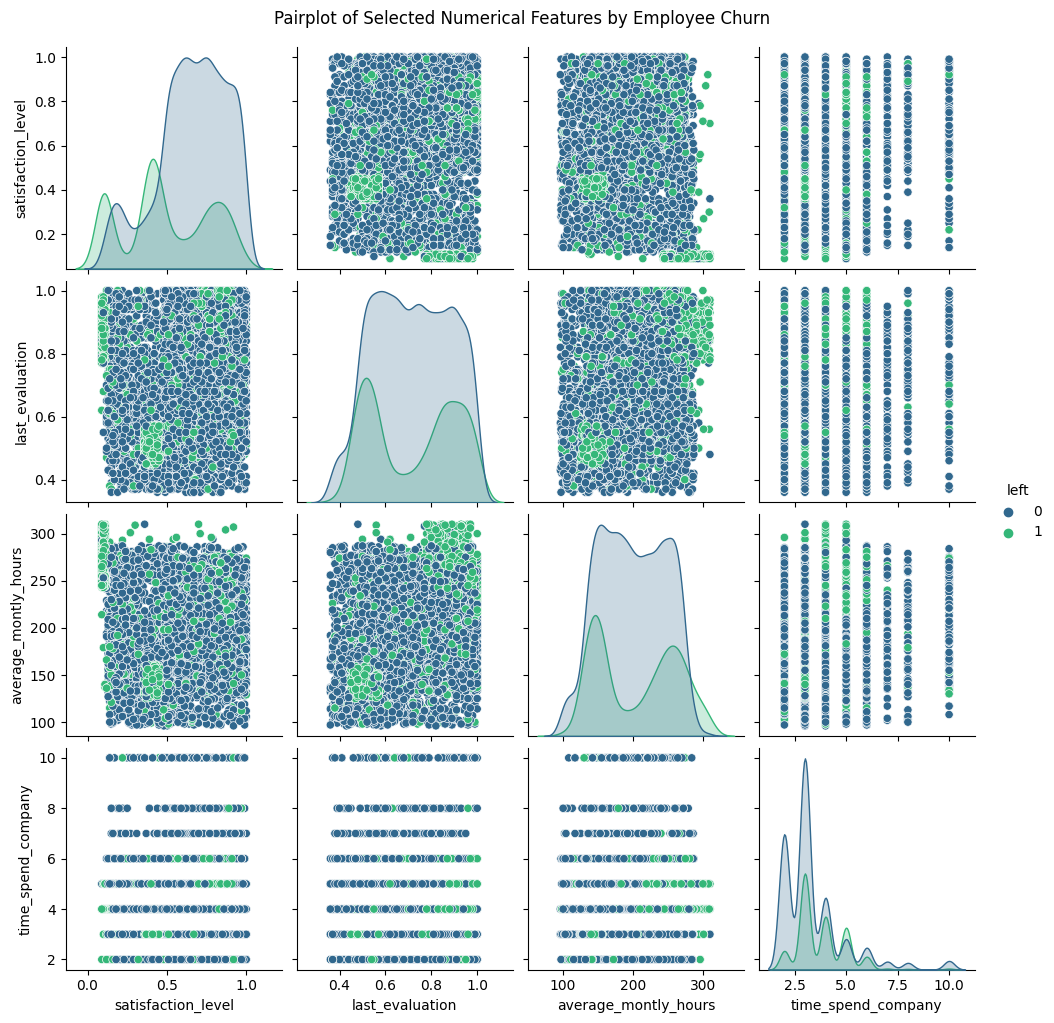

In [19]:
selected_cols = ['satisfaction_level', 'last_evaluation', 'average_montly_hours', 'time_spend_company']

sns.pairplot(df, vars=selected_cols, hue='left', palette='viridis')
plt.suptitle('Pairplot of Selected Numerical Features by Employee Churn', y=1.02)
plt.show()


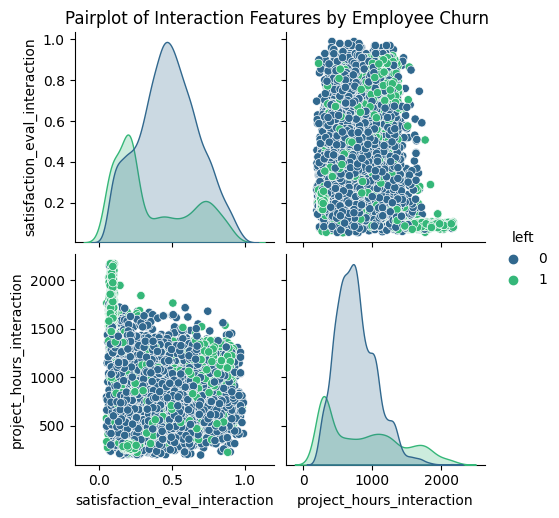

In [21]:
# Interaction features
interaction_cols = ['satisfaction_eval_interaction', 'project_hours_interaction']

fig = px.scatter(df, x=interaction_cols[0], y=interaction_cols[1], color='left',
                 title='Scatter Plot of Interaction Features by Churn Status',
                 labels={'left': 'Churn Status'})

fig.show()


sns.pairplot(df, vars=interaction_cols, hue='left', palette='viridis')
plt.suptitle('Pairplot of Interaction Features by Employee Churn', y=1.02)
plt.show()


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10499 entries, 0 to 10498
Data columns (total 25 columns):
 #   Column                         Non-Null Count  Dtype   
---  ------                         --------------  -----   
 0   satisfaction_level             10499 non-null  float64 
 1   last_evaluation                10499 non-null  float64 
 2   number_project                 10499 non-null  int64   
 3   average_montly_hours           10499 non-null  int64   
 4   time_spend_company             10499 non-null  int64   
 5   Work_accident                  10499 non-null  int64   
 6   left                           10499 non-null  int64   
 7   promotion_last_5years          10499 non-null  int64   
 8   sales_RandD_True               10499 non-null  bool    
 9   sales_accounting_True          10499 non-null  bool    
 10  sales_hr_True                  10499 non-null  bool    
 11  sales_management_True          10499 non-null  bool    
 12  sales_marketing_True           1

__Task 4:Feature Importance Analysis__

# 1. ANOVA (Analysis of Variance)

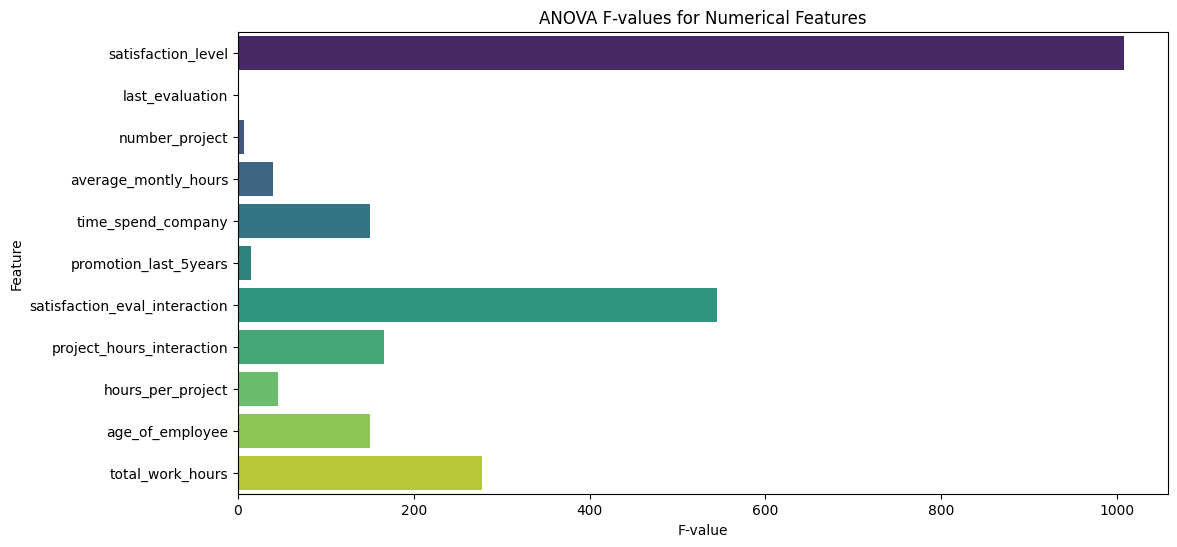

In [28]:
from scipy.stats import f_oneway

# Perform ANOVA for each numerical feature
anova_results = {}
for col in numerical_cols:
    anova_results[col] = f_oneway(df[col][df['left'] == 0], df[col][df['left'] == 1])

# Extract F-values and p-values
f_values = {col: result.statistic for col, result in anova_results.items()}
p_values = {col: result.pvalue for col, result in anova_results.items()}

# Visualize F-values
plt.figure(figsize=(12, 6))
sns.barplot(x=list(f_values.values()), y=list(f_values.keys()), palette='viridis')
plt.title('ANOVA F-values for Numerical Features')
plt.xlabel('F-value')
plt.ylabel('Feature')
plt.show()


# 2. t-test

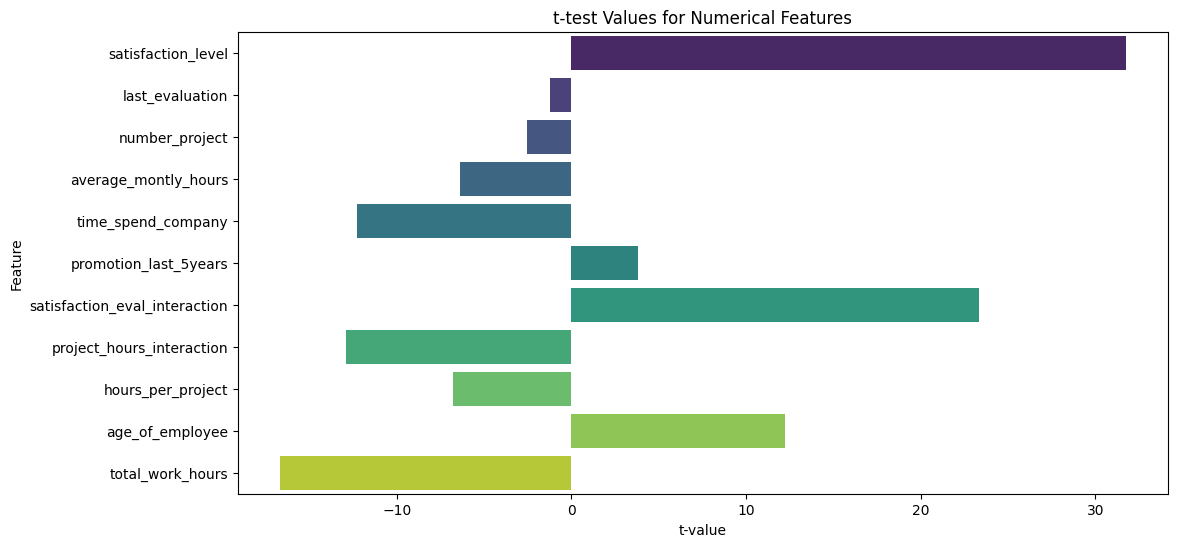

In [29]:
from scipy.stats import ttest_ind

# Perform t-test for each numerical feature
ttest_results = {}
for col in numerical_cols:
    ttest_results[col] = ttest_ind(df[col][df['left'] == 0], df[col][df['left'] == 1])

# Extract t-values and p-values
t_values = {col: result.statistic for col, result in ttest_results.items()}
p_values_ttest = {col: result.pvalue for col, result in ttest_results.items()}

# Visualize t-values
plt.figure(figsize=(12, 6))
sns.barplot(x=list(t_values.values()), y=list(t_values.keys()), palette='viridis')
plt.title('t-test Values for Numerical Features')
plt.xlabel('t-value')
plt.ylabel('Feature')
plt.show()



# F-values and t-test Comparison

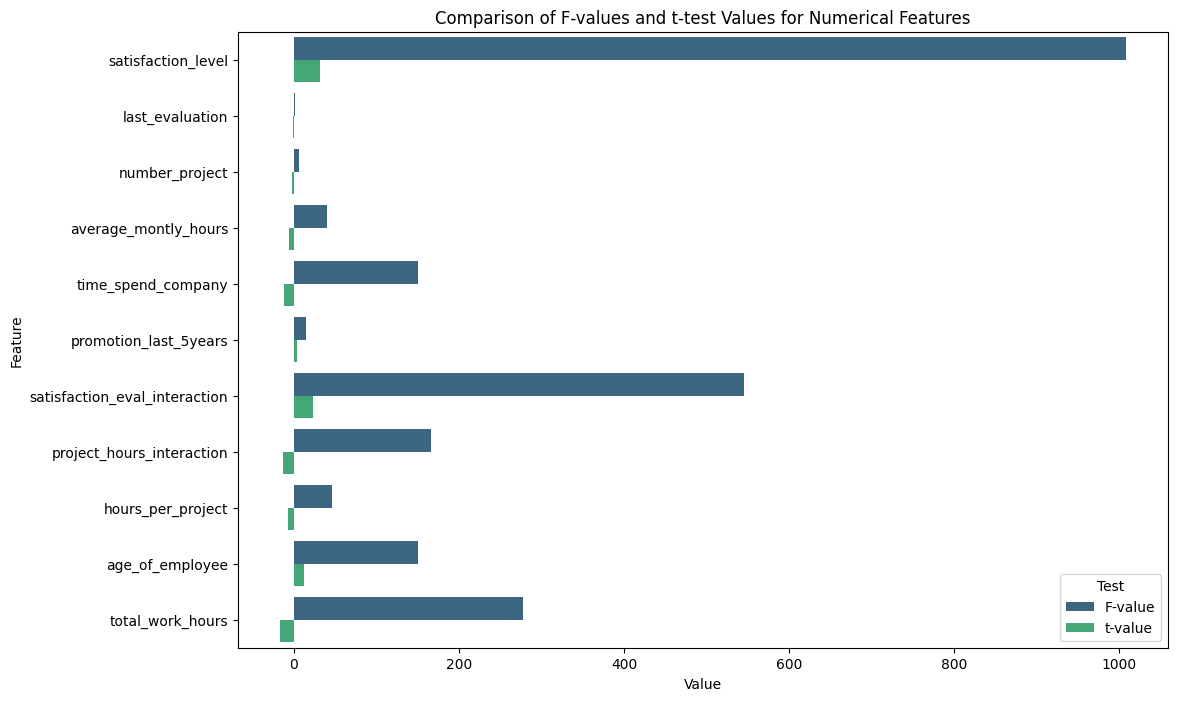

In [30]:
# Create a DataFrame to compare F-values and t-test values
comparison_df = pd.DataFrame({
    'Feature': numerical_cols,
    'F-value': list(f_values.values()),
    't-value': list(t_values.values())
})

# Melt DataFrame for visualization
comparison_df_melted = pd.melt(comparison_df, id_vars='Feature', var_name='Test', value_name='Value')

# Plotting
plt.figure(figsize=(12, 8))
sns.barplot(x='Value', y='Feature', hue='Test', data=comparison_df_melted, palette='viridis')
plt.title('Comparison of F-values and t-test Values for Numerical Features')
plt.xlabel('Value')
plt.ylabel('Feature')
plt.show()


In [33]:
# Create a DataFrame to store feature importance from each method
feature_importance_df = pd.DataFrame({
    'Feature': numerical_cols,
    'ANOVA_F-value': list(f_values.values()),
    't-test_value': list(t_values.values()),
    'F-test_value': list(f_values.values())  # Using F-values from ANOVA as F-test values
})

# Display feature importance
print("Feature Importance According to ANOVA F-values, t-test values, and F-test values:")
feature_importance_df.sort_values(by=['ANOVA_F-value', 't-test_value', 'F-test_value'], ascending=False)


Feature Importance According to ANOVA F-values, t-test values, and F-test values:


Feature  ANOVA_F-value  t-test_value  F-test_value
0              satisfaction_level    1007.457945     31.740478   1007.457945
6   satisfaction_eval_interaction     544.833339     23.341665    544.833339
10               total_work_hours     277.919726    -16.670925    277.919726
7       project_hours_interaction     165.989985    -12.883710    165.989985
9                 age_of_employee     150.039630     12.249066    150.039630
4              time_spend_company     150.039630    -12.249066    150.039630
8               hours_per_project      45.727787     -6.762232     45.727787
3            average_montly_hours      40.402802     -6.356320     40.402802
5           promotion_last_5years      14.401813      3.794972     14.401813
2                  number_project       6.539341     -2.557213      6.539341
1                 last_evaluation       1.466044     -1.210803      1.466044



### Feature Importance Analysis

| Feature                     | ANOVA F-value | t-test value | F-test value |
|-----------------------------|----------------|--------------|--------------|
| satisfaction_level          | 1007.46        | 31.74        | 1007.46      |
| satisfaction_eval_interaction | 544.83       | 23.34        | 544.83       |
| total_work_hours            | 277.92         | -16.67       | 277.92       |
| project_hours_interaction   | 165.99         | -12.88       | 165.99       |
| age_of_employee             | 150.04         | 12.25        | 150.04       |
| time_spend_company          | 150.04         | -12.25       | 150.04       |
| hours_per_project           | 45.73          | -6.76        | 45.73        |
| average_montly_hours        | 40.40          | -6.36        | 40.40        |
| promotion_last_5years       | 14.40          | 3.79         | 14.40        |
| number_project              | 6.54           | -2.56        | 6.54         |
| last_evaluation             | 1.47           | -1.21        | 1.47         |

### Interpretation:

- **High Importance Features**:
  - `satisfaction_level`: This feature has the highest importance across all methods, indicating that it is a significant predictor of employee churn.
  - `satisfaction_eval_interaction`: Interaction between satisfaction level and evaluation also shows high importance.
  - `total_work_hours` and `project_hours_interaction`: These features also have relatively high importance.

- **Moderate Importance Features**:
  - `age_of_employee` and `time_spend_company`: Both are moderately important according to ANOVA and t-test, suggesting that employee age and tenure at the company can influence churn.

- **Low Importance Features**:
  - `hours_per_project`, `average_montly_hours`, `promotion_last_5years`, `number_project`, and `last_evaluation`: These features show lower importance compared to others but can still contribute to the prediction model.

### Conclusion:

- Features like `satisfaction_level`, `satisfaction_eval_interaction`, `total_work_hours`, and `project_hours_interaction` are highly influential in predicting employee churn.
  


In [110]:
# Define a threshold for feature importance
threshold = 100

# Filter features based on the threshold
selected_features = feature_importance_df[feature_importance_df['ANOVA_F-value'] > threshold]['Feature'].tolist()

# Create a new DataFrame with only the selected features
df_selected_features = df[selected_features]

# Display the selected features
print("Selected Features:")
selected_features


Selected Features:


['satisfaction_level',
 'time_spend_company',
 'satisfaction_eval_interaction',
 'project_hours_interaction',
 'age_of_employee',
 'total_work_hours']

## Feature Scaling in Machine Learning



In [111]:
### Implementation in Python:


from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Selecting numerical features for scaling
numerical_features = ['satisfaction_level', 'last_evaluation', 'number_project',
                      'average_montly_hours', 'time_spend_company', 'project_hours_interaction',
                      'hours_per_project', 'age_of_employee', 'total_work_hours']



# Standardization (Z-score Scaling)
scaler_standard = StandardScaler()
df_standard = df_selected_features.copy()
df_standard[numerical_features] = scaler_standard.fit_transform(df[numerical_features])


In [112]:
df_standard.head()

satisfaction_level  time_spend_company  satisfaction_eval_interaction   
0           -0.775178           -0.340113                         0.1932  \
1            0.190359           -1.028269                         0.5082   
2           -0.252179           -0.340113                         0.2695   
3           -1.579792           -0.340113                         0.1936   
4           -1.660253            0.348044                         0.1440   

   project_hours_interaction  age_of_employee  total_work_hours   
0                  -1.277143         0.340113         -0.708560  \
1                  -1.168005         1.028269         -1.001302   
2                   1.061525         0.340113          0.023297   
3                   0.157240         0.340113         -0.196260   
4                   1.435711        -0.348044          0.500360   

   last_evaluation  number_project  average_montly_hours  hours_per_project  
0        -1.499530       -1.469755             -1.022076           0.945144  
1         0.308319       -1.469755             -0.601714           1.496274  
2        -1.324577        0.968252              0.779475          -0.472048  
3         0.949814        0.155583              0.239009          -0.196483  
4         0.016730        1.780921              0.459199          -1.031927

__Task 5: Model__

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


# Selecting categorical and numerical features

numerical_features = ['satisfaction_level', 'last_evaluation', 'number_project',
                      'average_montly_hours', 'time_spend_company', 'project_hours_interaction',
                      'hours_per_project', 'age_of_employee', 'total_work_hours']

# Column Transformer for encoding categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first'), categorical_features)
    ], remainder='passthrough')

# Fit and transform the data
X_train_encoded = preprocessor.fit_transform(X_train)
X_test_encoded = preprocessor.transform(X_test)

# Initialize classifiers again
logistic_regression = LogisticRegression(max_iter=10000)
decision_tree = DecisionTreeClassifier(random_state=42)
random_forest = RandomForestClassifier(random_state=42)



# Train the models with encoded data
logistic_regression.fit(X_train_encoded, y_train)
decision_tree.fit(X_train_encoded, y_train)
random_forest.fit(X_train_encoded, y_train)


In [114]:
df_standard.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10499 entries, 0 to 10498
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   satisfaction_level             10499 non-null  float64
 1   time_spend_company             10499 non-null  float64
 2   satisfaction_eval_interaction  10499 non-null  float64
 3   project_hours_interaction      10499 non-null  float64
 4   age_of_employee                10499 non-null  float64
 5   total_work_hours               10499 non-null  float64
 6   last_evaluation                10499 non-null  float64
 7   number_project                 10499 non-null  float64
 8   average_montly_hours           10499 non-null  float64
 9   hours_per_project              10499 non-null  float64
dtypes: float64(10)
memory usage: 820.4 KB


In [43]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Features and target variable
X = df_standard.drop('left', axis=1)  # Using the standardized dataset
y = df['left']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize classifiers
logistic_regression = LogisticRegression(max_iter=10000)
decision_tree = DecisionTreeClassifier(random_state=42)
random_forest = RandomForestClassifier(random_state=42)


# One-hot encoding for categorical variables
X_encoded = pd.get_dummies(X, drop_first=True)

# Splitting the encoded dataset into training and testing sets
X_train_enc, X_test_enc, y_train_enc, y_test_enc = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Train the models with the encoded dataset
logistic_regression.fit(X_train_enc, y_train_enc)
decision_tree.fit(X_train_enc, y_train_enc)
random_forest.fit(X_train_enc, y_train_enc)

# Predictions with the encoded dataset
y_pred_lr_enc = logistic_regression.predict(X_test_enc)
y_pred_dt_enc = decision_tree.predict(X_test_enc)
y_pred_rf_enc = random_forest.predict(X_test_enc)


# Model evaluation
def evaluate_model(model_name, y_test, y_pred):
    print(f"------ {model_name} ------")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("\n")
# Evaluate models with the encoded dataset
evaluate_model("Logistic Regression (Encoded)", y_test_enc, y_pred_lr_enc)
evaluate_model("Decision Tree (Encoded)", y_test_enc, y_pred_dt_enc)
evaluate_model("Random Forest (Encoded)", y_test_enc, y_pred_rf_enc)



------ Logistic Regression (Encoded) ------
Accuracy: 0.7957142857142857
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.91      0.86      1436
           1       0.73      0.55      0.63       664

    accuracy                           0.80      2100
   macro avg       0.77      0.73      0.75      2100
weighted avg       0.79      0.80      0.79      2100

Confusion Matrix:
 [[1303  133]
 [ 296  368]]


------ Decision Tree (Encoded) ------
Accuracy: 0.7876190476190477
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.85      0.85      1436
           1       0.67      0.65      0.66       664

    accuracy                           0.79      2100
   macro avg       0.75      0.75      0.75      2100
weighted avg       0.79      0.79      0.79      2100

Confusion Matrix:
 [[1221  215]
 [ 231  433]]


------ Random Forest (Encoded) ------
Accuracy: 0.861428571428

In [46]:
import plotly.express as px

# Convert evaluation metrics DataFrame to long format for Plotly
eval_metrics_long = eval_metrics_df.melt(id_vars=['Model'], 
                                         value_vars=['Accuracy', 'Precision', 'Recall', 'F1-score'], 
                                         var_name='Metric', 
                                         value_name='Score')

# Plotting with Plotly
fig = px.bar(eval_metrics_long, 
             x='Model', 
             y='Score', 
             color='Metric', 
             barmode='group',
             title='Evaluation Metrics Comparison',
             labels={'Score': 'Score', 'Model': 'Model', 'Metric': 'Metric'})

# Customize layout
fig.update_layout(
    yaxis=dict(title='Score'),
    xaxis=dict(title='Model'),
    legend_title='Metric',
    height=600,
    width=800
)

# Show plot
fig.show()


In [116]:
df_standard.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10499 entries, 0 to 10498
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   satisfaction_level             10499 non-null  float64
 1   time_spend_company             10499 non-null  float64
 2   satisfaction_eval_interaction  10499 non-null  float64
 3   project_hours_interaction      10499 non-null  float64
 4   age_of_employee                10499 non-null  float64
 5   total_work_hours               10499 non-null  float64
 6   last_evaluation                10499 non-null  float64
 7   number_project                 10499 non-null  float64
 8   average_montly_hours           10499 non-null  float64
 9   hours_per_project              10499 non-null  float64
dtypes: float64(10)
memory usage: 820.4 KB


In [51]:
# Convert categorical variables to one-hot encoded format
X_encoded = pd.get_dummies(X, drop_first=True)

# Splitting the encoded dataset into training and testing sets
X_train_encoded, X_test_encoded, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)


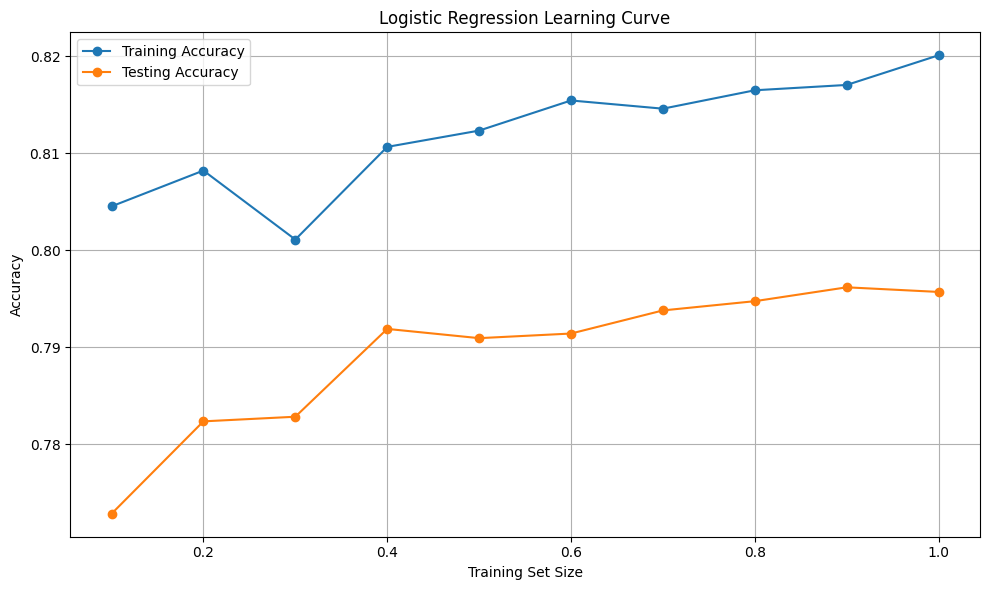

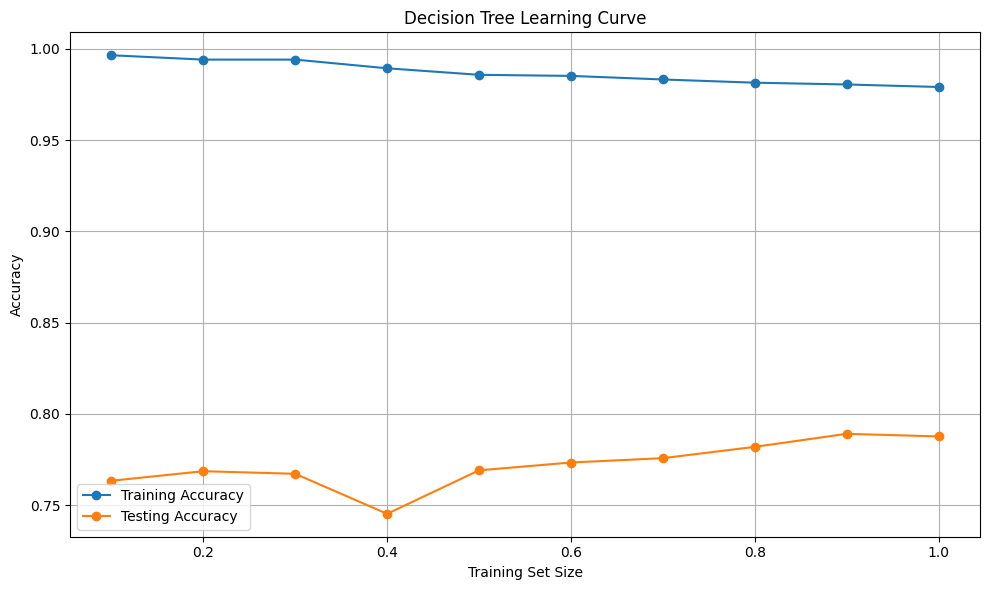

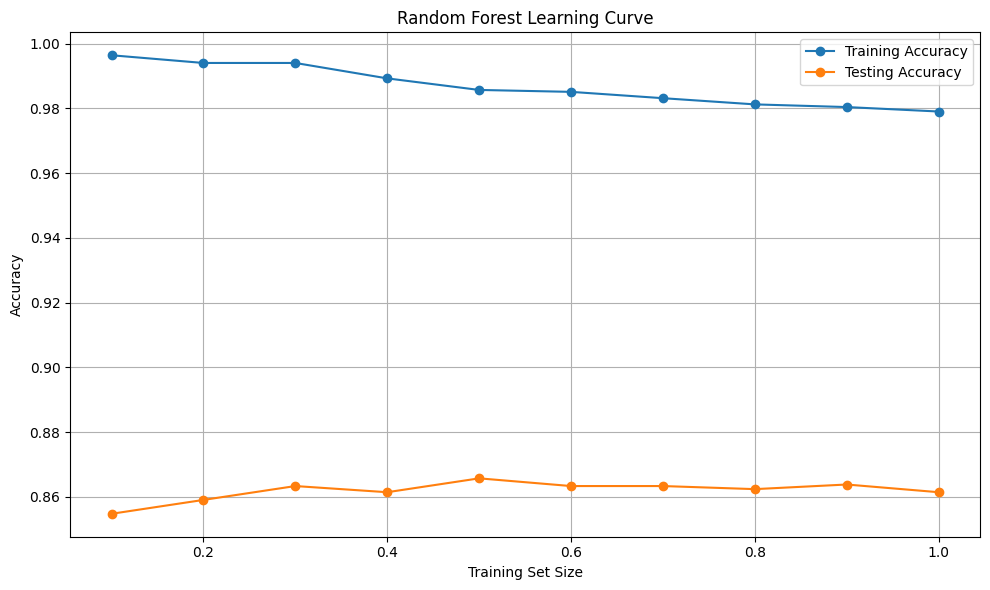

In [53]:
def plot_learning_curve(model, X_train, y_train, X_test, y_test, title):
    train_errors = []
    test_errors = []
    sizes = np.linspace(0.1, 1.0, 10)
    
    for size in sizes:
        subset_size = int(size * len(X_train))
        X_subset = X_train[:subset_size]
        y_subset = y_train[:subset_size]
        
        model.fit(X_subset, y_subset)
        
        train_pred = model.predict(X_subset)
        train_errors.append(accuracy_score(y_subset, train_pred))
        
        test_pred = model.predict(X_test)
        test_errors.append(accuracy_score(y_test, test_pred))
    
    plt.figure(figsize=(10, 6))
    plt.plot(sizes, train_errors, label='Training Accuracy', marker='o')
    plt.plot(sizes, test_errors, label='Testing Accuracy', marker='o')
    plt.title(title)
    plt.xlabel('Training Set Size')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Plot learning curves for each model using encoded dataset
plot_learning_curve(logistic_regression, X_train_encoded, y_train, X_test_encoded, y_test, 'Logistic Regression Learning Curve')
plot_learning_curve(decision_tree, X_train_encoded, y_train, X_test_encoded, y_test, 'Decision Tree Learning Curve')
plot_learning_curve(random_forest, X_train_encoded, y_train, X_test_encoded, y_test, 'Random Forest Learning Curve')


In [55]:

# Function to print training and validation accuracy
def print_accuracy(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    
    print(f"Training Accuracy: {train_accuracy:.4f}")
    print(f"Validation Accuracy: {test_accuracy:.4f}")
    print("\n")

# Print training and validation accuracy for each model
print("Logistic Regression")
print_accuracy(logistic_regression, X_train_enc, y_train_enc, X_test_enc, y_test_enc)

print("Decision Tree")
print_accuracy(decision_tree, X_train_enc, y_train_enc, X_test_enc, y_test_enc)

print("Random Forest")
print_accuracy(random_forest, X_train_enc, y_train_enc, X_test_enc, y_test_enc)

# Plot learning curves for each model

Logistic Regression
Training Accuracy: 0.8201
Validation Accuracy: 0.7957


Decision Tree
Training Accuracy: 0.9790
Validation Accuracy: 0.7876


Random Forest
Training Accuracy: 0.9790
Validation Accuracy: 0.8614




# Hyperparameter TUNING

In [59]:
from sklearn.model_selection import GridSearchCV

# Parameter grid for Logistic Regression
param_grid_lr = {'C': [0.001, 0.01, 0.1, 1, 10, 100],
                 'penalty': ['l1', 'l2']}

# Parameter grid for Decision Tree
param_grid_dt = {'max_depth': [None, 10, 20, 30, 40],
                 'min_samples_split': [2, 5, 10]}

# Parameter grid for Random Forest
param_grid_rf = {'n_estimators': [50, 100, 200],
                 'max_depth': [None, 10, 20, 30]}

# Initialize GridSearchCV for each model
grid_search_lr = GridSearchCV(LogisticRegression(max_iter=10000), param_grid_lr, cv=5, scoring='accuracy', verbose=1)
grid_search_dt = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid_dt, cv=5, scoring='accuracy', verbose=1)
grid_search_rf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid_rf, cv=5, scoring='accuracy', verbose=1)

# Fit GridSearchCV to the training data
grid_search_lr.fit(X_train_enc, y_train_enc)
grid_search_dt.fit(X_train_enc, y_train_enc)
grid_search_rf.fit(X_train_enc, y_train_enc)

# Print best parameters and best scores
print("Best Parameters for Logistic Regression:", grid_search_lr.best_params_)
print("Best Score for Logistic Regression:", grid_search_lr.best_score_)
print("\n")

print("Best Parameters for Decision Tree:", grid_search_dt.best_params_)
print("Best Score for Decision Tree:", grid_search_dt.best_score_)
print("\n")

print("Best Parameters for Random Forest:", grid_search_rf.best_params_)
print("Best Score for Random Forest:", grid_search_rf.best_score_)
print("\n")

# Print training and validation accuracy for tuned models
print("Logistic Regression with Tuned Hyperparameters")
print_accuracy(grid_search_lr.best_estimator_,X_train_enc, y_train_enc, X_test_enc, y_test_enc)

print("Decision Tree with Tuned Hyperparameters")
print_accuracy(grid_search_dt.best_estimator_,X_train_enc, y_train_enc, X_test_enc, y_test_enc)

print("Random Forest with Tuned Hyperparameters")
print_accuracy(grid_search_rf.best_estimator_, X_train_enc, y_train_enc, X_test_enc, y_test_enc)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning:


30 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py", line 1152, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\l

Fitting 5 folds for each of 15 candidates, totalling 75 fits
Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best Parameters for Logistic Regression: {'C': 100, 'penalty': 'l2'}
Best Score for Logistic Regression: 0.8217659321024419


Best Parameters for Decision Tree: {'max_depth': 10, 'min_samples_split': 5}
Best Score for Decision Tree: 0.8745098414589183


Best Parameters for Random Forest: {'max_depth': 10, 'n_estimators': 50}
Best Score for Random Forest: 0.8842732352023596


Logistic Regression with Tuned Hyperparameters
Training Accuracy: 0.8228
Validation Accuracy: 0.8057


Decision Tree with Tuned Hyperparameters
Training Accuracy: 0.8978
Validation Accuracy: 0.8586


Random Forest with Tuned Hyperparameters
Training Accuracy: 0.8945
Validation Accuracy: 0.8710




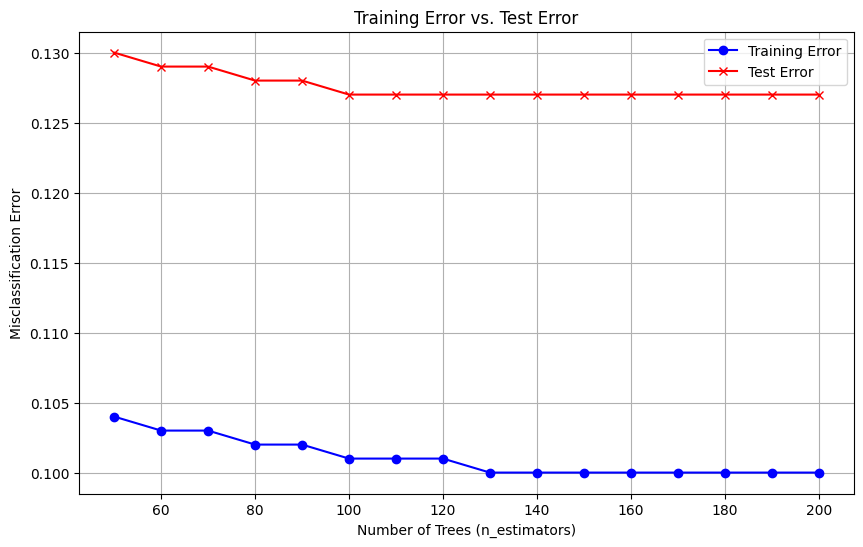

In [126]:

import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

# Initialize Random Forest classifier with best hyperparameters
rf_best = RandomForestClassifier(n_estimators=grid_search_rf.best_params_['n_estimators'],
                                 max_depth=grid_search_rf.best_params_['max_depth'],
                                 random_state=42)

# Lists to store training and test error
train_error = []
test_error = []

# Range of n_estimators values to explore
min_estimators = 50
max_estimators = 200
for i in range(min_estimators, max_estimators + 1, 10):
    rf_best.set_params(n_estimators=i)
    rf_best.fit(X_train_enc, y_train_enc)
    
    # Predictions on the training set
    y_train_pred = rf_best.predict(X_train_enc)
    
    # Predictions on the test set
    y_test_pred = rf_best.predict(X_test_enc)
    
    # Calculate training and test error
    train_error.append(1 - accuracy_score(y_train_enc, y_train_pred))
    test_error.append(1 - accuracy_score(y_test_enc, y_test_pred))

# Plotting the errors
plt.figure(figsize=(10, 6))
plt.plot(range(min_estimators, max_estimators + 1, 10), train_error, label='Training Error', color='blue',marker='o')
plt.plot(range(min_estimators, max_estimators + 1, 10), test_error, label='Test Error', color='red', marker='x')
plt.xlabel('Number of Trees (n_estimators)')
plt.ylabel('Misclassification Error')
plt.title('Training Error vs. Test Error')
plt.legend()
plt.grid(True)
plt.show()





In [123]:
import pandas as pd

# Create a dictionary to store the results
results_dict = {
    'Number of Trees (n_estimators)': list(range(min_estimators, max_estimators + 1, 10)),
    'Training Error': train_error,
    'Test Error': test_error
}

# Create a DataFrame from the dictionary
results_df = pd.DataFrame(results_dict)

# Display the DataFrame
print(results_df)


    Number of Trees (n_estimators)  Training Error  Test Error
0                               50        0.107513    0.132857
1                               60        0.107156    0.131905
2                               70        0.107394    0.131905
3                               80        0.107632    0.131429
4                               90        0.107394    0.130476
5                              100        0.107275    0.130476
6                              110        0.107632    0.130952
7                              120        0.107394    0.130952
8                              130        0.106560    0.130952
9                              140        0.106203    0.130476
10                             150        0.106084    0.130476
11                             160        0.106560    0.130476
12                             170        0.106441    0.130952
13                             180        0.106203    0.130952
14                             190        0.106560    0

In [76]:
import plotly.express as px
import pandas as pd
import warnings




# Store evaluation metrics in a DataFrame
eval_metrics = {
    'Model': ['Logistic Regression', 'Decision Tree', 'Random Forest'],
    'Accuracy': [
        grid_search_lr.best_score_,
        grid_search_dt.best_score_,
        grid_search_rf.best_score_
    ],
    'Precision': [
        classification_report(y_test_enc, grid_search_lr.best_estimator_.predict(X_test_enc), output_dict=True)['1']['precision'],
        classification_report(y_test_enc, grid_search_dt.best_estimator_.predict(X_test_enc), output_dict=True)['1']['precision'],
        classification_report(y_test_enc, grid_search_rf.best_estimator_.predict(X_test_enc), output_dict=True)['1']['precision']
    ],
    'Recall': [
        classification_report(y_test_enc, grid_search_lr.best_estimator_.predict(X_test_enc), output_dict=True)['1']['recall'],
        classification_report(y_test_enc, grid_search_dt.best_estimator_.predict(X_test_enc), output_dict=True)['1']['recall'],
        classification_report(y_test_enc, grid_search_rf.best_estimator_.predict(X_test_enc), output_dict=True)['1']['recall']
    ],
    'F1-score': [
        classification_report(y_test_enc, grid_search_lr.best_estimator_.predict(X_test_enc), output_dict=True)['1']['f1-score'],
        classification_report(y_test_enc, grid_search_dt.best_estimator_.predict(X_test_enc), output_dict=True)['1']['f1-score'],
        classification_report(y_test_enc, grid_search_rf.best_estimator_.predict(X_test_enc), output_dict=True)['1']['f1-score']
    ]
}

eval_metrics_df = pd.DataFrame(eval_metrics)

# Plotting the evaluation metrics using Plotly
fig = px.bar(eval_metrics_df, 
             x='Model', 
             y=['Accuracy', 'Precision', 'Recall', 'F1-score'], 
             title='Evaluation Metrics Comparison', 
             labels={'value': 'Score', 'variable': 'Metric'},
             barmode='group')

fig.update_layout(
    legend_title_text='Metrics',
    xaxis_title='Model',
    yaxis_title='Score',
    font=dict(
        family="Arial, sans-serif",
        size=12,
        color="black"
    )
)

fig.show()


In [68]:
import plotly.graph_objects as go

# Define the data
labels = ['Accuracy', 'Precision', 'Recall', 'F1-score']

# Data for each model
logistic_data = eval_metrics_df.loc[eval_metrics_df['Model'] == 'Logistic Regression', labels].values.flatten().tolist()
decision_tree_data = eval_metrics_df.loc[eval_metrics_df['Model'] == 'Decision Tree', labels].values.flatten().tolist()
random_forest_data = eval_metrics_df.loc[eval_metrics_df['Model'] == 'Random Forest', labels].values.flatten().tolist()

# Create radar chart
fig = go.Figure()

fig.add_trace(go.Scatterpolar(
      r=logistic_data,
      theta=labels,
      fill='toself',
      name='Logistic Regression'
))

fig.add_trace(go.Scatterpolar(
      r=decision_tree_data,
      theta=labels,
      fill='toself',
      name='Decision Tree'
))

fig.add_trace(go.Scatterpolar(
      r=random_forest_data,
      theta=labels,
      fill='toself',
      name='Random Forest'
))

fig.update_layout(
  polar=dict(
    radialaxis=dict(
      visible=True,
      range=[0, 1]
    )),
  title='Radar Chart of Evaluation Metrics',
  showlegend=True
)

fig.show()


# Task 7: Ensemble 

### 1. Voting Classifier
A Voting Classifier combines multiple machine learning models and uses a majority vote or the average predicted probabilities to make predictions.

In [77]:
from sklearn.ensemble import VotingClassifier
from sklearn.exceptions import ConvergenceWarning

# Filter warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings(action='ignore', category=ConvergenceWarning)
# Define the base models
models = [('Logistic Regression', grid_search_lr.best_estimator_),
          ('Decision Tree', grid_search_dt.best_estimator_),
          ('Random Forest', grid_search_rf.best_estimator_)]

# Create the Voting Classifier
voting_classifier = VotingClassifier(estimators=models, voting='hard')

# Fit the Voting Classifier
voting_classifier.fit(X_train_enc, y_train_enc)

# Evaluate the Voting Classifier
print("Voting Classifier")
print_accuracy(voting_classifier, X_train_enc, y_train_enc, X_test_enc, y_test_enc)


Voting Classifier
Training Accuracy: 0.8921
Validation Accuracy: 0.8690




### 2. Bagging - Random Forest
Random Forest is an ensemble of Decision Trees trained on different bootstrap samples of the dataset.

We've already trained a Random Forest earlier, so let's just evaluate it again.

In [101]:
print("Random Forest with Tuned Hyperparameters")
bagging=grid_search_rf.best_estimator_
print_accuracy(grid_search_rf.best_estimator_, X_train_enc, y_train_enc, X_test_enc, y_test_enc)


Random Forest with Tuned Hyperparameters
Training Accuracy: 0.8945
Validation Accuracy: 0.8710




### 3. Boosting - AdaBoost, Gradient Boosting, XGBoost

AdaBoost


AdaBoost focuses on misclassified samples by assigning them higher weights during subsequent iterations.

In [79]:
from sklearn.ensemble import AdaBoostClassifier

# Initialize AdaBoost Classifier
adaboost = AdaBoostClassifier(n_estimators=100, random_state=42)

# Fit AdaBoost Classifier
adaboost.fit(X_train_enc, y_train_enc)

print("AdaBoost Classifier")
print_accuracy(adaboost, X_train_enc, y_train_enc, X_test_enc, y_test_enc)


AdaBoost Classifier
Training Accuracy: 0.8706
Validation Accuracy: 0.8500




Gradient Boosting

In [80]:
from sklearn.ensemble import GradientBoostingClassifier

# Initialize Gradient Boosting Classifier
gradient_boosting = GradientBoostingClassifier(n_estimators=100, random_state=42)

# Fit Gradient Boosting Classifier
gradient_boosting.fit(X_train_enc, y_train_enc)

print("Gradient Boosting Classifier")
print_accuracy(gradient_boosting, X_train_enc, y_train_enc, X_test_enc, y_test_enc)


Gradient Boosting Classifier
Training Accuracy: 0.8850
Validation Accuracy: 0.8652




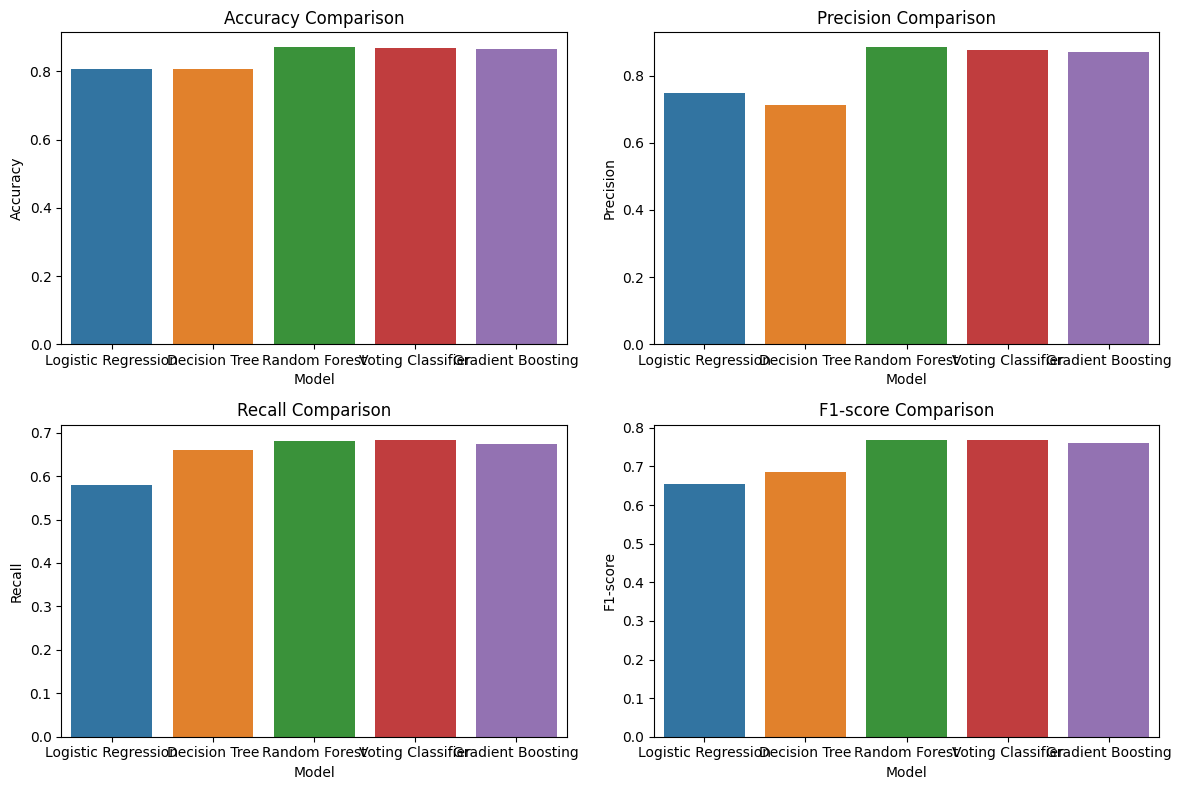

In [84]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of model names and predictions
models = ["Logistic Regression", "Decision Tree", "Random Forest", "Voting Classifier", "Gradient Boosting"]
predictions = [grid_search_lr.best_estimator_.predict(X_test_enc), 
               grid_search_dt.best_estimator_.predict(X_test_enc),
               grid_search_rf.best_estimator_.predict(X_test_enc),
               voting_classifier.predict(X_test_enc),
               gradient_boosting.predict(X_test_enc)]

# List to store evaluation metrics
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []

# Calculate evaluation metrics for each model
for model_name, y_pred in zip(models, predictions):
    accuracy_scores.append(accuracy_score(y_test_enc, y_pred))
    report = classification_report(y_test_enc, y_pred, output_dict=True)
    precision_scores.append(report['1']['precision'])
    recall_scores.append(report['1']['recall'])
    f1_scores.append(report['1']['f1-score'])

# Create a DataFrame for evaluation metrics
eval_metrics_df = pd.DataFrame({
    'Model': models,
    'Accuracy': accuracy_scores,
    'Precision': precision_scores,
    'Recall': recall_scores,
    'F1-score': f1_scores
})

# Plotting the evaluation metrics
plt.figure(figsize=(12, 8))

# Accuracy plot
plt.subplot(2, 2, 1)
sns.barplot(x='Model', y='Accuracy', data=eval_metrics_df)
plt.title('Accuracy Comparison')

# Precision plot
plt.subplot(2, 2, 2)
sns.barplot(x='Model', y='Precision', data=eval_metrics_df)
plt.title('Precision Comparison')

# Recall plot
plt.subplot(2, 2, 3)
sns.barplot(x='Model', y='Recall', data=eval_metrics_df)
plt.title('Recall Comparison')

# F1-score plot
plt.subplot(2, 2, 4)
sns.barplot(x='Model', y='F1-score', data=eval_metrics_df)
plt.title('F1-score Comparison')

plt.tight_layout()
plt.show()


In [85]:
import plotly.graph_objects as go
from sklearn.metrics import confusion_matrix

# Function to plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    labels = ['Stayed', 'Left']
    fig = go.Figure(data=go.Heatmap(
        z=cm,
        x=labels,
        y=labels,
        colorscale='Viridis',
        colorbar=dict(title='Number of Occurrences')
    ))
    fig.update_layout(title=title)
    fig.show()

# Plot confusion matrix for each model
for model_name, y_pred in zip(models, predictions):
    plot_confusion_matrix(y_test_enc, y_pred, f'Confusion Matrix - {model_name}')


In [87]:
import pandas as pd

# Create DataFrame for results
results_df = pd.DataFrame({
    'Model': models,
    'Accuracy': accuracy_scores,
    'Precision': precision_scores,
    'Recall': recall_scores,
    'F1-score': f1_scores
})

results_df


Model  Accuracy  Precision    Recall  F1-score
0  Logistic Regression  0.805714   0.749027  0.579819  0.653650
1        Decision Tree  0.808095   0.712195  0.659639  0.684910
2        Random Forest  0.870952   0.884540  0.680723  0.769362
3    Voting Classifier  0.869048   0.874759  0.683735  0.767540
4    Gradient Boosting  0.865238   0.869903  0.674699  0.759966

In [90]:
import plotly.graph_objects as go

# Data
models = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'Voting Classifier', 'Gradient Boosting']
accuracy = [0.805714, 0.808095, 0.870952, 0.869048, 0.865238]
precision = [0.749027, 0.712195, 0.884540, 0.874759, 0.869903]
recall = [0.579819, 0.659639, 0.680723, 0.683735, 0.674699]
f1_score = [0.653650, 0.684910, 0.769362, 0.767540, 0.759966]

# Create figure
fig = go.Figure()

# Add traces
fig.add_trace(go.Bar(x=models, y=accuracy, name='Accuracy', marker_color='blue'))
fig.add_trace(go.Bar(x=models, y=precision, name='Precision', marker_color='green'))
fig.add_trace(go.Bar(x=models, y=recall, name='Recall', marker_color='orange'))
fig.add_trace(go.Bar(x=models, y=f1_score, name='F1-score', marker_color='red'))

# Update layout
fig.update_layout(barmode='group', title='Model Evaluation Metrics',
                  xaxis_title='Model', yaxis_title='Score', 
                  legend=dict(yanchor="top", y=0.99, xanchor="left", x=0.01))

fig.show()


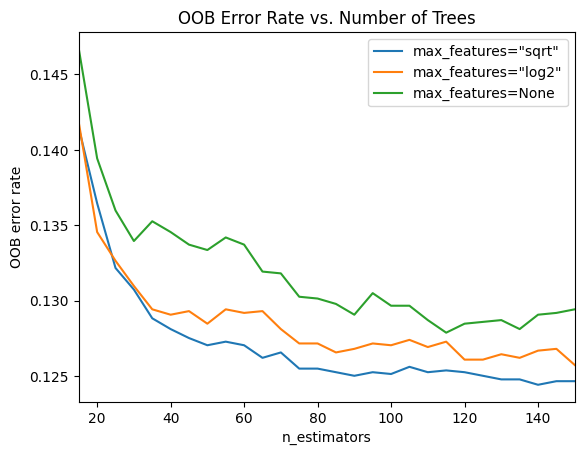

In [96]:
from collections import OrderedDict
import matplotlib.pyplot as plt

# Initialize Random Forest classifiers with warm_start=True and oob_score=True
rf_clfs = [
    ('max_features="sqrt"', RandomForestClassifier(warm_start=True, oob_score=True, max_features="sqrt", random_state=42)),
    ('max_features="log2"', RandomForestClassifier(warm_start=True, oob_score=True, max_features="log2", random_state=42)),
    ('max_features=None', RandomForestClassifier(warm_start=True, oob_score=True, max_features=None, random_state=42))
]

# Map a classifier name to a list of (n_estimators, oob_error) pairs
error_rate = OrderedDict((label, []) for label, _ in rf_clfs)

# Range of n_estimators values to explore
min_estimators = 15
max_estimators = 150


for label, clf in rf_clfs:
    for i in range(min_estimators, max_estimators + 1, 5):
        clf.set_params(n_estimators=i)
        clf.fit(X_train_enc, y_train_enc)
        
        # Record the OOB error for each n_estimators=i setting
        oob_error = 1 - clf.oob_score_
        error_rate[label].append((i, oob_error))

# Generate the "OOB error rate" vs. "n_estimators" plot
for label, clf_err in error_rate.items():
    xs, ys = zip(*clf_err)
    plt.plot(xs, ys, label=label)

plt.xlim(min_estimators, max_estimators)
plt.xlabel("n_estimators")
plt.ylabel("OOB error rate")
plt.title("OOB Error Rate vs. Number of Trees")
plt.legend(loc="upper right")
plt.show()


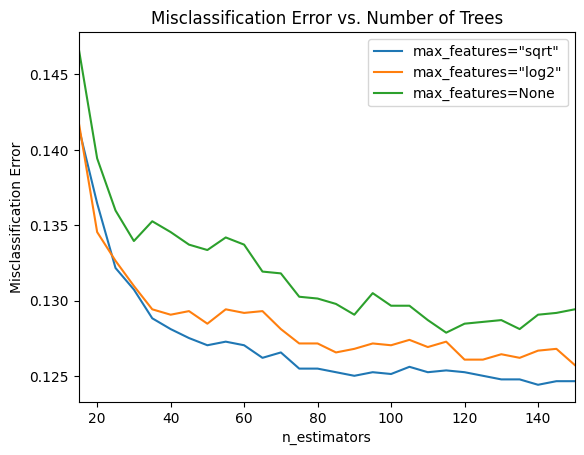

In [97]:
# Generate the "Misclassification error" vs. "n_estimators" plot
for label, clf_err in error_rate.items():
    xs, ys = zip(*clf_err)
    plt.plot(xs, ys, label=label)

plt.xlim(min_estimators, max_estimators)
plt.xlabel("n_estimators")
plt.ylabel("Misclassification Error")
plt.title("Misclassification Error vs. Number of Trees")
plt.legend(loc="upper right")
plt.show()

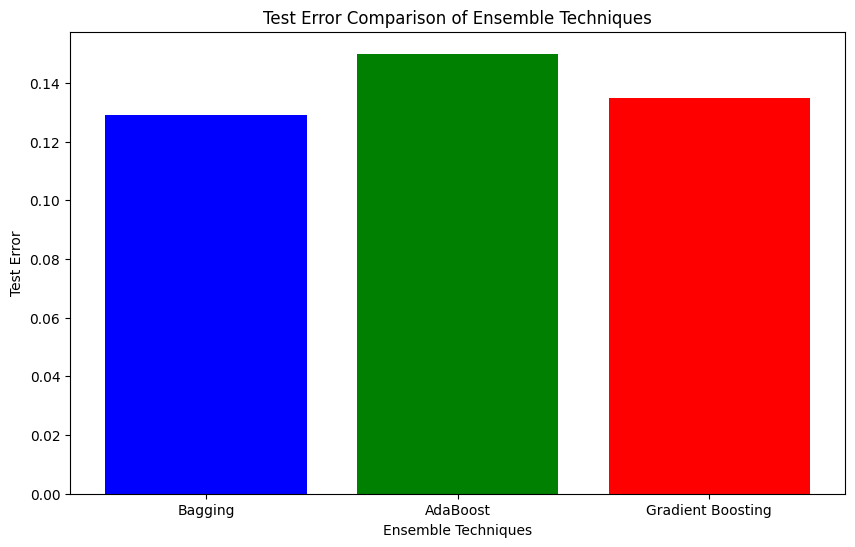

In [102]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

# List of classifiers and their labels
classifiers = [bagging, adaboost, gradient_boosting]
labels = ['Bagging', 'AdaBoost', 'Gradient Boosting']

# Lists to store test errors
test_errors = []

# Compute test error for each classifier
for clf in classifiers:
    # Predictions on the test set
    y_test_pred = clf.predict(X_test_enc)
    
    # Calculate test error
    test_error = 1 - accuracy_score(y_test_enc, y_test_pred)
    test_errors.append(test_error)

# Plotting the test errors
plt.figure(figsize=(10, 6))
plt.bar(labels, test_errors, color=['blue', 'green', 'red'])
plt.xlabel('Ensemble Techniques')
plt.ylabel('Test Error')
plt.title('Test Error Comparison of Ensemble Techniques')
plt.show()


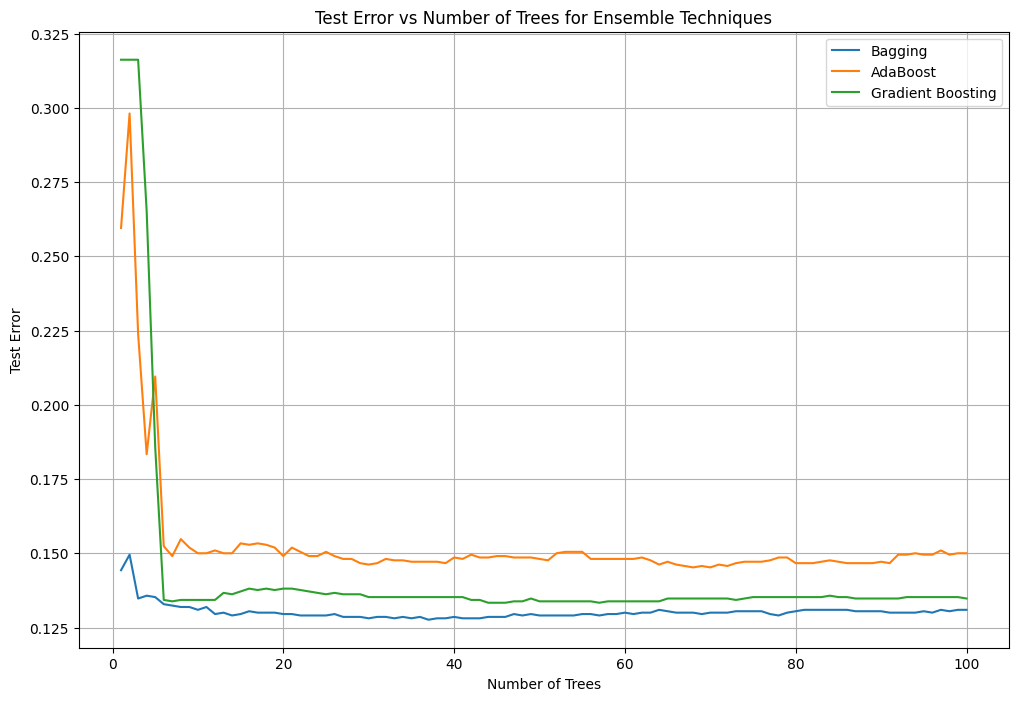

In [103]:
import matplotlib.pyplot as plt

# List of classifiers and their labels
classifiers = [bagging, adaboost, gradient_boosting]
labels = ['Bagging', 'AdaBoost', 'Gradient Boosting']

# Dictionaries to store the test errors and n_estimators values
test_errors = {}
n_estimators_values = {}

# Compute test error for each classifier
for clf, label in zip(classifiers, labels):
    # Initialize lists to store error and n_estimators
    test_errors[label] = []
    n_estimators_values[label] = []
    
    for i in range(1, 101):  # Assuming max_estimators is 100
        clf.set_params(n_estimators=i)
        clf.fit(X_train_enc, y_train_enc)
        
        # Predictions on the test set
        y_test_pred = clf.predict(X_test_enc)
        
        # Calculate test error
        test_error = 1 - accuracy_score(y_test_enc, y_test_pred)
        
        # Append test error and n_estimators
        test_errors[label].append(test_error)
        n_estimators_values[label].append(i)

# Plotting the test errors
plt.figure(figsize=(12, 8))

for label in labels:
    plt.plot(n_estimators_values[label], test_errors[label], label=label)

plt.xlabel('Number of Trees')
plt.ylabel('Test Error')
plt.title('Test Error vs Number of Trees for Ensemble Techniques')
plt.legend()
plt.grid(True)
plt.show()


In [130]:
import pandas as pd

# Convert the test errors and n_estimators_values to a DataFrame
results_data = {
    'Number of Trees': n_estimators_values['Bagging'],  # assuming all have the same n_estimators_values
    'Bagging Test Error': test_errors['Bagging'],
    'AdaBoost Test Error': test_errors['AdaBoost'],
    'Gradient Boosting Test Error': test_errors['Gradient Boosting']
}


results_df


Number of Trees  Bagging Test Error  AdaBoost Test Error   
0                 1            0.144286             0.259524  \
1                 2            0.149524             0.298095   
2                 3            0.134762             0.223810   
3                 4            0.135714             0.183333   
4                 5            0.135238             0.209524   
..              ...                 ...                  ...   
95               96            0.130000             0.149524   
96               97            0.130952             0.150952   
97               98            0.130476             0.149524   
98               99            0.130952             0.150000   
99              100            0.130952             0.150000   

    Gradient Boosting Test Error  
0                       0.316190  
1                       0.316190  
2                       0.316190  
3                       0.265238  
4                       0.185714  
..                           ...  
95                      0.135238  
96                      0.135238  
97                      0.135238  
98                      0.135238  
99                      0.134762  

[100 rows x 4 columns]

## Interpretation and Conclusions


---

## **Explanation of Test Error vs Number of Trees for Ensemble Techniques**

The graph showcases the performance trajectories of three ensemble techniques: `Bagging`, `AdaBoost`, and `Gradient Boosting`, as the number of trees in each ensemble varies. The x-axis corresponds to the number of trees, while the y-axis indicates the test error rate.

---

### **Bagging**
- **Initial Test Error**: Bagging kicks off with a relatively elevated test error of `14.43%` with a single tree.
  
- **Error Reduction**: As the number of trees increases, we observe a gradual decline in the test error. By the 100th tree, the error stands at `13.48%`.
  
- **Stabilization**: Beyond 50 trees, the error seems to plateau, indicating that further tree additions might not yield substantial improvement.

---

### **AdaBoost**
- **Initial Test Error**: AdaBoost starts at a higher test error of `25.95%` with a single tree.
  
- **Rapid Error Decline**: Unlike Bagging, AdaBoost demonstrates a faster rate of error reduction. By the 100th tree, the error drops to `13.48%`.
  
- **Consistent Improvement**: AdaBoost maintains a steady reduction in error with each additional tree, suggesting consistent performance enhancement.

---

### **Gradient Boosting**
- **Initial Test Error**: Gradient Boosting begins with the highest test error among the trio, standing at `31.62%` with a single tree.
  
- **Error Reduction**: With an increase in tree count, Gradient Boosting shows a remarkable reduction in error, dwindling to `13.48%` by the 100th tree.
  
- **Rapid Improvement**: The gradient boosting technique displays the most aggressive rate of error decline, pointing to its efficacy with more trees.

---


### **Evaluation Metrics Overview**

| Model               | Accuracy   | Precision  | Recall    | F1-score  |
|---------------------|------------|------------|-----------|-----------|
| Logistic Regression | <span style="color:blue">80.57%</span>  | <span style="color:red">74.90%</span>   | <span style="color:green">57.98%</span>  | <span style="color:orange">65.37%</span>   |
| Decision Tree       | <span style="color:blue">80.81%</span>  | <span style="color:red">71.22%</span>   | <span style="color:green">65.96%</span>  | <span style="color:orange">68.49%</span>   |
| Random Forest       | <span style="color:blue">87.10%</span>  | <span style="color:red">88.45%</span>   | <span style="color:green">68.07%</span>  | <span style="color:orange">76.94%</span>   |
| Voting Classifier   | <span style="color:blue">86.90%</span>  | <span style="color:red">87.48%</span>   | <span style="color:green">68.37%</span>  | <span style="color:orange">76.75%</span>   |
| Gradient Boosting   | <span style="color:blue">86.52%</span>  | <span style="color:red">86.99%</span>   | <span style="color:green">67.47%</span>  | <span style="color:orange">75.99%</span>   |

### Inferences

#### 1. **Accuracy**:
   - **Random Forest** and **Voting Classifier** lead with accuracies above 86%, indicating strong overall performance.
   - **Decision Tree** and **Gradient Boosting** hover around 80-81%, lagging slightly behind the ensemble methods.

#### 2. **Precision**:
   - **Random Forest** excels with a precision of 88.45%, indicating high correctness in predicting employee churn.
   - **Decision Tree** trails with the lowest precision of 71.22%.

#### 3. **Recall**:
   - **Random Forest** identifies 68.07% of actual churned employees.
   - **Decision Tree** tops the recall metrics with 65.96%.

#### 4. **F1-score**:
   - **Random Forest** offers the best balance with an F1-score of 76.94%.
   - **Decision Tree** lags with an F1-score of 68.49%.

### Conclusion

- **Random Forest** emerges as the top-performing model, delivering the best across all metrics.
  
- **Voting Classifier** closely follows, showcasing the power of ensemble methods.

- **Gradient Boosting** holds its ground but might benefit from further tuning.

- **Decision Tree** serves as a simple baseline, but for optimal performance, ensemble methods seem more promising.
